In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [3]:
# Replace with the actual file path or name
df = pd.read_excel('Modulation Dataset.xlsx', index_col=False)  

print("Shape of dataset:", df.shape)
df.head()


Shape of dataset: (500, 4)


,Input Bit,Modulated signal data,Noisy signal data,Demodulated Output
0,1,1.41420,2.32010,1
1,0,1.14410,0.71302,0
2,0,0.43702,0.84210,0
3,0,-0.43702,-1.06390,0
4,0,-1.14410,-1.30940,0


In [4]:
df.drop('Input Bit', axis =1, inplace =True)

In [5]:
df.head()

,Modulated signal data,Noisy signal data,Demodulated Output
0,1.41420,2.32010,1
1,1.14410,0.71302,0
2,0.43702,0.84210,0
3,-0.43702,-1.06390,0
4,-1.14410,-1.30940,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Modulated signal data  500 non-null    float64
 1   Noisy signal data      500 non-null    float64
 2   Demodulated Output     500 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 11.8 KB


In [7]:
print(df.isna().sum())


Modulated signal data    0
Noisy signal data        0
Demodulated Output       0
dtype: int64


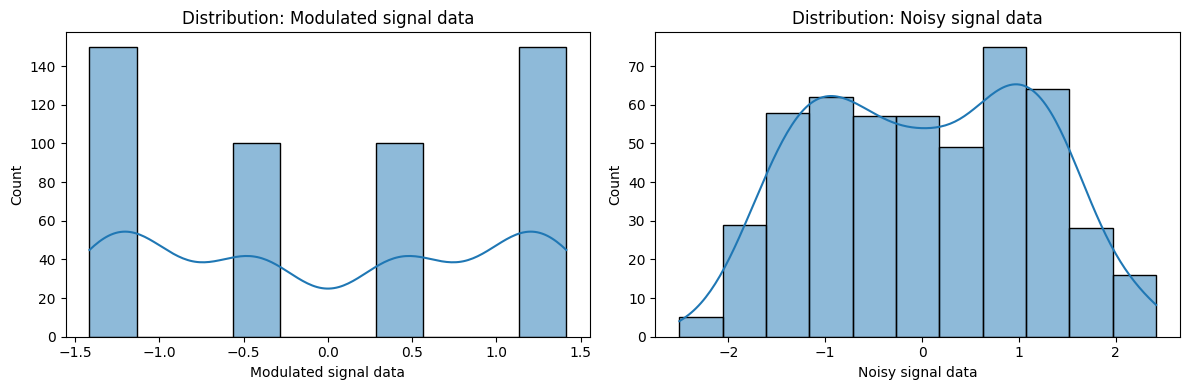

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Histogram for 'Modulated signal data'
sns.histplot(data=df, x='Modulated signal data', kde=True, ax=axes[0])
axes[0].set_title('Distribution: Modulated signal data')

# Histogram for 'Noisy signal data'
sns.histplot(data=df, x='Noisy signal data', kde=True, ax=axes[1])
axes[1].set_title('Distribution: Noisy signal data')

plt.tight_layout()
plt.show()


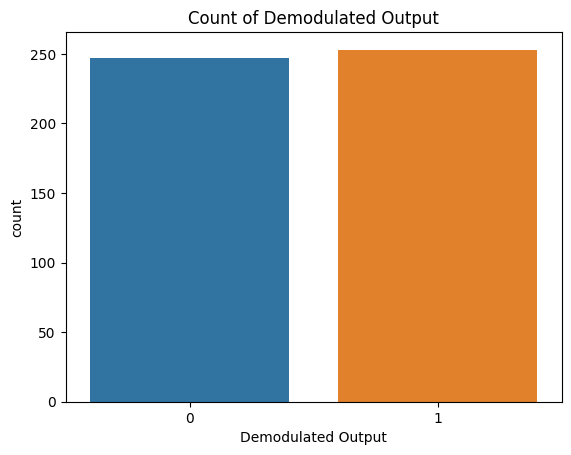

In [9]:
sns.countplot(x='Demodulated Output', data=df)
plt.title('Count of Demodulated Output')
plt.show()


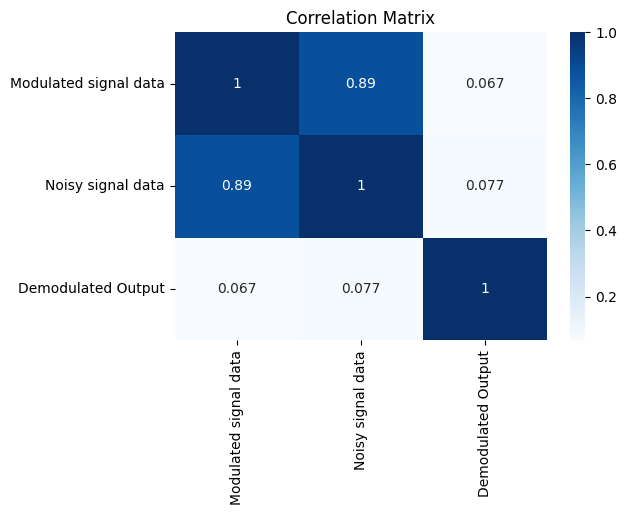

In [10]:
corr_matrix = df.corr()
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='Blues')
plt.title("Correlation Matrix")
plt.show()


In [11]:
# Features and Target
X = df[['Modulated signal data', 'Noisy signal data']]
y = df['Demodulated Output']

# Train-Test Split (e.g., 80%-20%)
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)

#  Feature Scaling (Optional but recommended for SVC/LogisticRegression)
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled  = scaler.transform(X_test)


In [12]:
# Define model
log_reg = LogisticRegression(solver='liblinear') 
# 'liblinear' supports l1 and l2 penalties

# Define parameter grid
param_grid_lr = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 1, 10, 100]
}

# Grid search with 5-fold cross-validation
grid_lr = GridSearchCV(
    estimator=log_reg,
    param_grid=param_grid_lr,
    scoring='accuracy',
    cv=5,
    n_jobs=-1
)

grid_lr.fit(X_train_scaled, y_train)

print("Best params (Logistic Regression):", grid_lr.best_params_)
print("Best CV accuracy (Logistic Regression):", grid_lr.best_score_)


Best params (Logistic Regression): {'C': 0.01, 'penalty': 'l2'}
Best CV accuracy (Logistic Regression): 0.53


In [13]:
# Define model
rf = RandomForestClassifier(random_state=42)

# Define parameter grid
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Could use GridSearchCV or RandomizedSearchCV
grid_rf = GridSearchCV(
    estimator=rf,
    param_grid=param_grid_rf,
    scoring='accuracy',
    cv=5,
    n_jobs=-1
)

grid_rf.fit(X_train_scaled, y_train)

print("Best params (Random Forest):", grid_rf.best_params_)
print("Best CV accuracy (Random Forest):", grid_rf.best_score_)


Best params (Random Forest): {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best CV accuracy (Random Forest): 0.5225


In [14]:
# Define model
svc_model = SVC()

# Define parameter grid
param_grid_svc = {
    'kernel': ['linear', 'rbf'],
    'C': [0.01, 0.1, 1, 10, 100],
    'gamma': ['scale', 'auto']  # relevant for rbf kernel
}

# Grid Search
grid_svc = GridSearchCV(
    estimator=svc_model,
    param_grid=param_grid_svc,
    scoring='accuracy',
    cv=5,
    n_jobs=-1
)

grid_svc.fit(X_train_scaled, y_train)

print("Best params (SVC):", grid_svc.best_params_)
print("Best CV accuracy (SVC):", grid_svc.best_score_)


Best params (SVC): {'C': 0.01, 'gamma': 'scale', 'kernel': 'rbf'}
Best CV accuracy (SVC): 0.515


In [15]:
# 6.1 Logistic Regression
best_lr = grid_lr.best_estimator_
y_pred_lr = best_lr.predict(X_test_scaled)

lr_accuracy = accuracy_score(y_test, y_pred_lr)
print("\nLogistic Regression Test Accuracy:", lr_accuracy)
print("Confusion Matrix (LR):\n", confusion_matrix(y_test, y_pred_lr))
print("Classification Report (LR):\n", classification_report(y_test, y_pred_lr))

# 6.2 Random Forest
best_rf = grid_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test_scaled)

rf_accuracy = accuracy_score(y_test, y_pred_rf)
print("\nRandom Forest Test Accuracy:", rf_accuracy)
print("Confusion Matrix (RF):\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report (RF):\n", classification_report(y_test, y_pred_rf))

# 6.3 SVC
best_svc = grid_svc.best_estimator_
y_pred_svc = best_svc.predict(X_test_scaled)

svc_accuracy = accuracy_score(y_test, y_pred_svc)
print("\nSVC Test Accuracy:", svc_accuracy)
print("Confusion Matrix (SVC):\n", confusion_matrix(y_test, y_pred_svc))
print("Classification Report (SVC):\n", classification_report(y_test, y_pred_svc))



Logistic Regression Test Accuracy: 0.54
Confusion Matrix (LR):
 [[25 28]
 [18 29]]
Classification Report (LR):
               precision    recall  f1-score   support

           0       0.58      0.47      0.52        53
           1       0.51      0.62      0.56        47

    accuracy                           0.54       100
   macro avg       0.55      0.54      0.54       100
weighted avg       0.55      0.54      0.54       100


Random Forest Test Accuracy: 0.44
Confusion Matrix (RF):
 [[20 33]
 [23 24]]
Classification Report (RF):
               precision    recall  f1-score   support

           0       0.47      0.38      0.42        53
           1       0.42      0.51      0.46        47

    accuracy                           0.44       100
   macro avg       0.44      0.44      0.44       100
weighted avg       0.44      0.44      0.44       100


SVC Test Accuracy: 0.47
Confusion Matrix (SVC):
 [[ 0 53]
 [ 0 47]]
Classification Report (SVC):
               precision    

c:\Users\NoorNahiyanB\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\NoorNahiyanB\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\NoorNahiyanB\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

In [16]:
model_results = {
    'Logistic Regression': lr_accuracy,
    'Random Forest': rf_accuracy,
    'SVC': svc_accuracy
}

for model_name, acc in model_results.items():
    print(f"{model_name}: {acc:.4f}")


Logistic Regression: 0.5400
Random Forest: 0.4400
SVC: 0.4700


Best Params (KNN): {'n_neighbors': 9, 'p': 1, 'weights': 'distance'}
Best CV Score (KNN): 0.5175

KNN Test Accuracy: 0.47
Confusion Matrix (KNN):
 [[23 30]
 [23 24]]
Classification Report (KNN):
               precision    recall  f1-score   support

           0       0.50      0.43      0.46        53
           1       0.44      0.51      0.48        47

    accuracy                           0.47       100
   macro avg       0.47      0.47      0.47       100
weighted avg       0.47      0.47      0.47       100



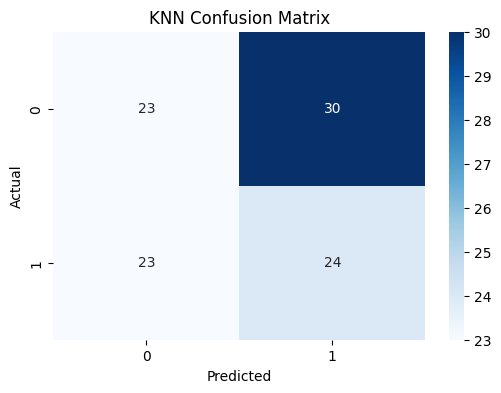

In [18]:
# For model building and evaluation
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 4. Feature Scaling (often beneficial for KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

# 5. Define KNN and hyperparameter grid
knn = KNeighborsClassifier()

param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],  # how distances are weighted
    'p': [1, 2]  # 1 for Manhattan distance, 2 for Euclidean
}

grid_knn = GridSearchCV(
    estimator=knn,
    param_grid=param_grid_knn,
    scoring='accuracy',
    cv=5,        # 5-fold cross validation
    n_jobs=-1
)

# 6. Fit the KNN model with hyperparameter tuning
grid_knn.fit(X_train_scaled, y_train)

# 7. Check best params and best score (on training folds)
print("Best Params (KNN):", grid_knn.best_params_)
print("Best CV Score (KNN):", grid_knn.best_score_)

# 8. Evaluate on the test set
best_knn = grid_knn.best_estimator_
y_pred_knn = best_knn.predict(X_test_scaled)

knn_accuracy = accuracy_score(y_test, y_pred_knn)
print("\nKNN Test Accuracy:", knn_accuracy)

# Confusion Matrix and Classification Report
cm_knn = confusion_matrix(y_test, y_pred_knn)
print("Confusion Matrix (KNN):\n", cm_knn)
print("Classification Report (KNN):\n", classification_report(y_test, y_pred_knn))

# Optional: visualize confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm_knn, annot=True, cmap='Blues', fmt='d')
plt.title("KNN Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

==== Evaluation for Logistic Regression (no tuning) ====
Accuracy:           0.5200
Balanced Accuracy:  0.5279
Precision (Macro):  0.5298
Recall (Macro):     0.5279
F1 Score (Macro):   0.5152

Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.40      0.47        53
           1       0.49      0.66      0.56        47

    accuracy                           0.52       100
   macro avg       0.53      0.53      0.52       100
weighted avg       0.53      0.52      0.51       100

Confusion Matrix:
 [[21 32]
 [16 31]]


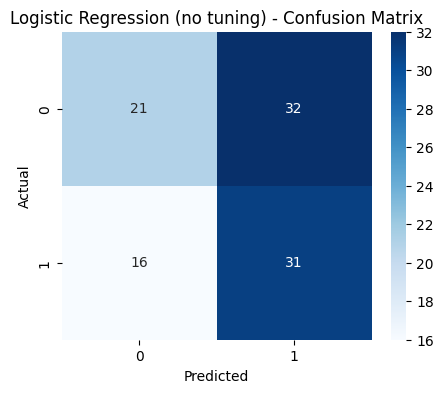



Best params (LR): {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}
==== Evaluation for Logistic Regression (tuned) ====
Accuracy:           0.5400
Balanced Accuracy:  0.5444
Precision (Macro):  0.5451
Recall (Macro):     0.5444
F1 Score (Macro):   0.5393

Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.47      0.52        53
           1       0.51      0.62      0.56        47

    accuracy                           0.54       100
   macro avg       0.55      0.54      0.54       100
weighted avg       0.55      0.54      0.54       100

Confusion Matrix:
 [[25 28]
 [18 29]]


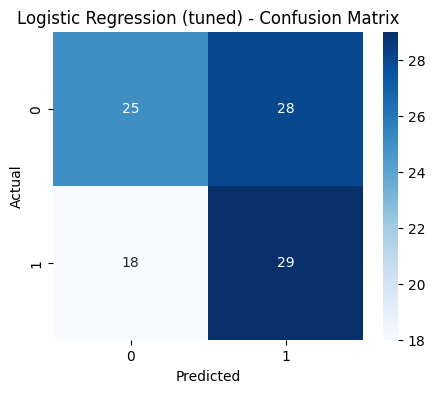



Best params (RF): {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
==== Evaluation for Random Forest (tuned) ====
Accuracy:           0.4400
Balanced Accuracy:  0.4440
Precision (Macro):  0.4431
Recall (Macro):     0.4440
F1 Score (Macro):   0.4391

Classification Report:
              precision    recall  f1-score   support

           0       0.47      0.38      0.42        53
           1       0.42      0.51      0.46        47

    accuracy                           0.44       100
   macro avg       0.44      0.44      0.44       100
weighted avg       0.44      0.44      0.44       100

Confusion Matrix:
 [[20 33]
 [23 24]]


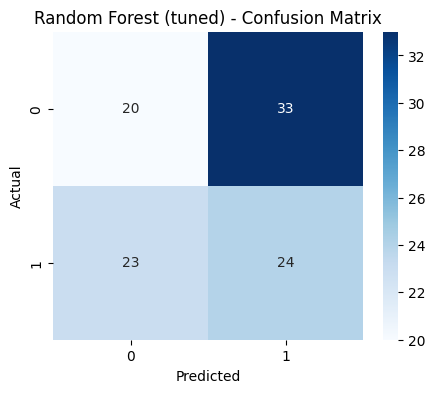



Best params (SVC): {'C': 0.01, 'gamma': 'scale', 'kernel': 'rbf'}
==== Evaluation for SVC (tuned) ====
Accuracy:           0.4700
Balanced Accuracy:  0.5000
Precision (Macro):  0.2350
Recall (Macro):     0.5000
F1 Score (Macro):   0.3197

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        53
           1       0.47      1.00      0.64        47

    accuracy                           0.47       100
   macro avg       0.23      0.50      0.32       100
weighted avg       0.22      0.47      0.30       100

Confusion Matrix:
 [[ 0 53]
 [ 0 47]]


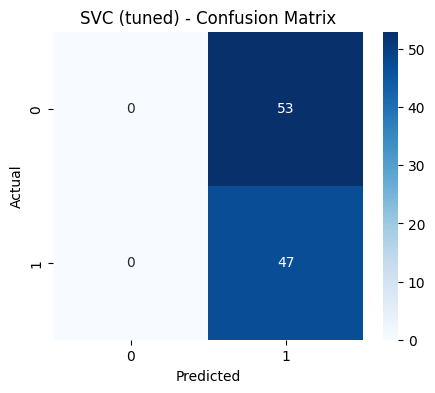



Best params (KNN): {'n_neighbors': 9, 'p': 1, 'weights': 'distance'}
==== Evaluation for KNN (tuned) ====
Accuracy:           0.4700
Balanced Accuracy:  0.4723
Precision (Macro):  0.4722
Recall (Macro):     0.4723
F1 Score (Macro):   0.4699

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.43      0.46        53
           1       0.44      0.51      0.48        47

    accuracy                           0.47       100
   macro avg       0.47      0.47      0.47       100
weighted avg       0.47      0.47      0.47       100

Confusion Matrix:
 [[23 30]
 [23 24]]


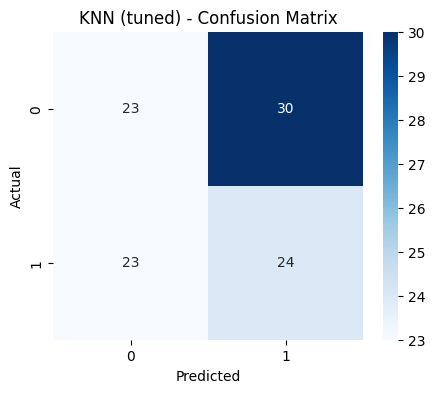



LogReg (tuned) -> Accuracy: 0.5400
RandomForest (tuned) -> Accuracy: 0.4400
SVC (tuned) -> Accuracy: 0.4700
KNN (tuned) -> Accuracy: 0.4700


In [21]:
import warnings
warnings.filterwarnings("ignore") 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import (
    accuracy_score,
    balanced_accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report
)
def evaluate_model(name, model, X_test, y_test):
    """
    Prints a variety of metrics for a given trained model.
    """
    y_pred = model.predict(X_test)
    
    # Calculate various metrics
    acc = accuracy_score(y_test, y_pred)
    bal_acc = balanced_accuracy_score(y_test, y_pred)
    precision_macro = precision_score(y_test, y_pred, average='macro')
    recall_macro = recall_score(y_test, y_pred, average='macro')
    f1_macro = f1_score(y_test, y_pred, average='macro')
    
    # Print results
    print(f"==== Evaluation for {name} ====")
    print(f"Accuracy:           {acc:.4f}")
    print(f"Balanced Accuracy:  {bal_acc:.4f}")
    print(f"Precision (Macro):  {precision_macro:.4f}")
    print(f"Recall (Macro):     {recall_macro:.4f}")
    print(f"F1 Score (Macro):   {f1_macro:.4f}\n")
    
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:\n", cm)
    
    # (Optional) Confusion Matrix Plot
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
    
    print("\n")  # blank line for readability


###############################################################################
# 6. LOGISTIC REGRESSION (Example: Simple or with GridSearch)
###############################################################################
# Option A: Simple logistic regression (no hyperparameter tuning)
lr_model = LogisticRegression()
lr_model.fit(X_train_scaled, y_train)
evaluate_model("Logistic Regression (no tuning)", lr_model, X_test_scaled, y_test)

# Option B: With hyperparameter tuning using GridSearchCV
param_grid_lr = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear']  # ensures l1 can be used
}
grid_lr = GridSearchCV(
    LogisticRegression(),
    param_grid_lr,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)
grid_lr.fit(X_train_scaled, y_train)

best_lr = grid_lr.best_estimator_
print("Best params (LR):", grid_lr.best_params_)
evaluate_model("Logistic Regression (tuned)", best_lr, X_test_scaled, y_test)


###############################################################################
# 7. RANDOM FOREST
###############################################################################
# Example hyperparameter grid
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
grid_rf = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid_rf,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)
grid_rf.fit(X_train_scaled, y_train)

best_rf = grid_rf.best_estimator_
print("Best params (RF):", grid_rf.best_params_)
evaluate_model("Random Forest (tuned)", best_rf, X_test_scaled, y_test)


###############################################################################
# 8. SVC
###############################################################################
param_grid_svc = {
    'kernel': ['linear', 'rbf'],
    'C': [0.01, 0.1, 1, 10, 100],
    'gamma': ['scale', 'auto']
}
grid_svc = GridSearchCV(
    SVC(probability=True),  # probability=True if you want predicted probabilities
    param_grid_svc,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)
grid_svc.fit(X_train_scaled, y_train)

best_svc = grid_svc.best_estimator_
print("Best params (SVC):", grid_svc.best_params_)
evaluate_model("SVC (tuned)", best_svc, X_test_scaled, y_test)


###############################################################################
# 9. KNN
###############################################################################
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # p=1 -> Manhattan distance, p=2 -> Euclidean distance
}
grid_knn = GridSearchCV(
    KNeighborsClassifier(),
    param_grid_knn,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)
grid_knn.fit(X_train_scaled, y_train)

best_knn = grid_knn.best_estimator_
print("Best params (KNN):", grid_knn.best_params_)
evaluate_model("KNN (tuned)", best_knn, X_test_scaled, y_test)

###############################################################################
# 10. COMPARE FINAL MODELS
###############################################################################
# For a quick numeric comparison, use accuracy only
models = {
    "LogReg (tuned)": best_lr,
    "RandomForest (tuned)": best_rf,
    "SVC (tuned)": best_svc,
    "KNN (tuned)": best_knn
}

for name, m in models.items():
    y_pred = m.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name} -> Accuracy: {acc:.4f}")


In [22]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def plot_decision_boundary(model, X, y, title="Decision Boundary"):
    """
    Plots the decision boundary for a classifier with two features.
    - model: trained classifier (with a .predict method)
    - X: 2D numpy array of shape (n_samples, 2), scaled or unscaled
    - y: true labels (same length as X)
    - title: plot title
    """
    # Create a mesh to plot decision boundary
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

    # Step size in the mesh (smaller => smoother boundary)
    h = 0.02
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, h),
        np.arange(y_min, y_max, h)
    )
    
    # Predict class for each point in the mesh
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Create the plot
    plt.figure(figsize=(8, 6))
    
    # 1) Plot the decision boundary with contourf (filled contours)
    #    If you have more than 2 classes, you may need a different color scheme.
    plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.coolwarm)

    # 2) Plot the training points
    sns.scatterplot(
        x=X[:, 0],
        y=X[:, 1],
        hue=y,           # color by class
        palette='coolwarm', 
        edgecolor='k'
    )
    
    plt.title(title)
    plt.xlabel("Feature 1 (scaled)")  # or original name if unscaled
    plt.ylabel("Feature 2 (scaled)")  # or original name if unscaled
    plt.show()


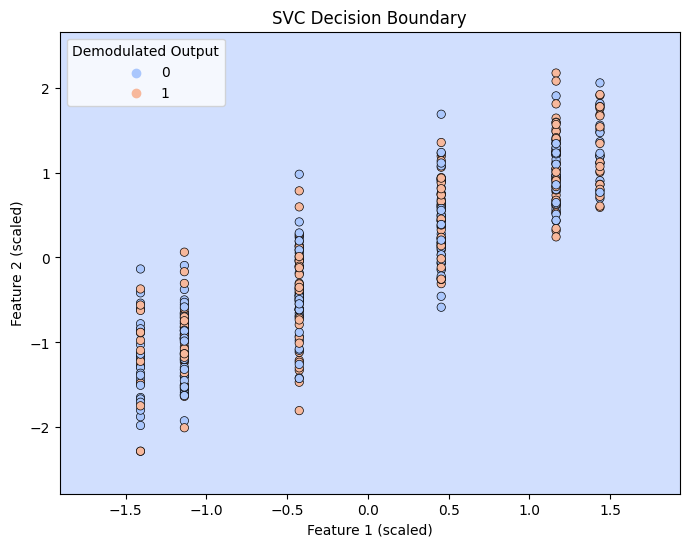

In [23]:
# Suppose we are visualizing SVC's boundary
plot_decision_boundary(best_svc, X_train_scaled, y_train, title="SVC Decision Boundary")


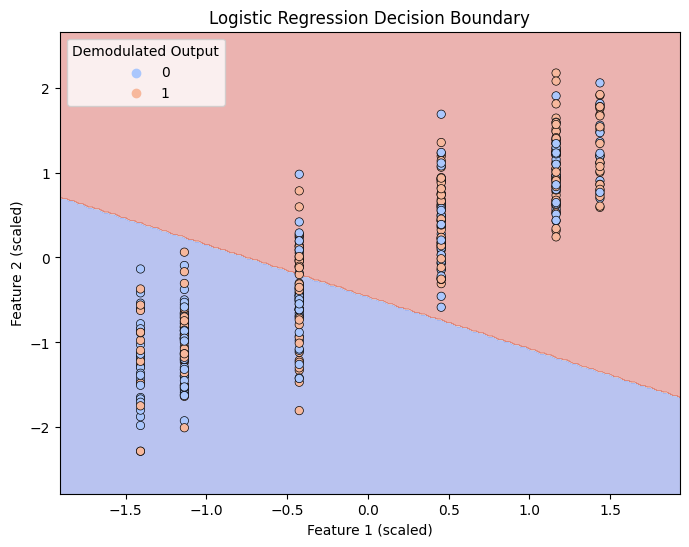

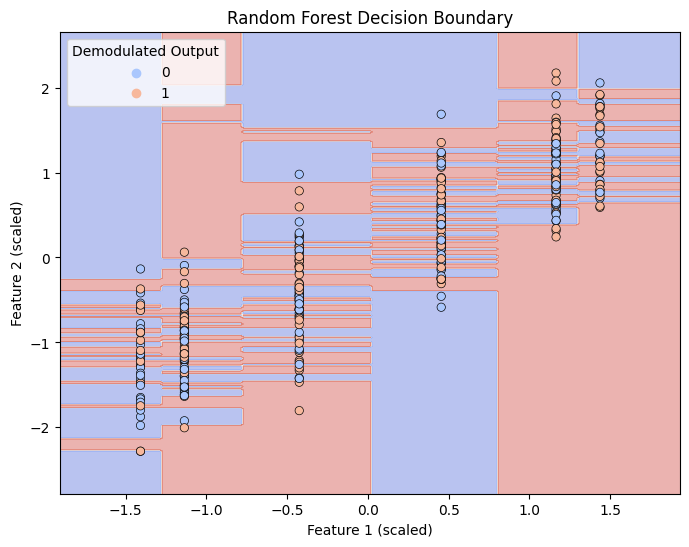

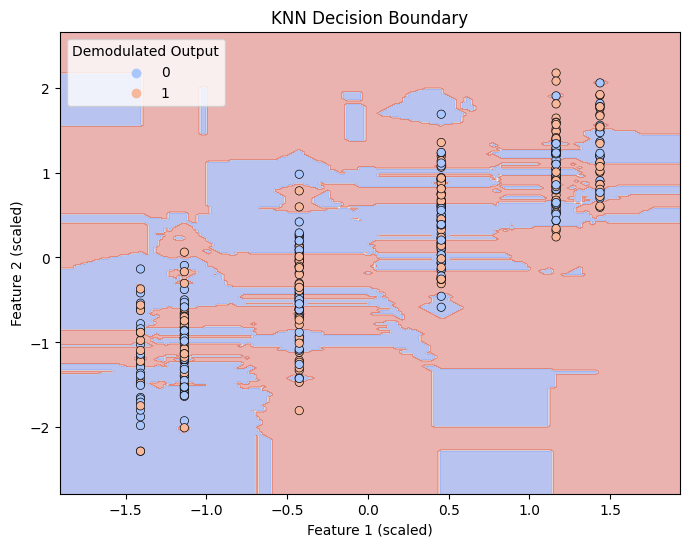

In [24]:
# For logistic regression
plot_decision_boundary(best_lr, X_train_scaled, y_train, title="Logistic Regression Decision Boundary")

# For random forest
plot_decision_boundary(best_rf, X_train_scaled, y_train, title="Random Forest Decision Boundary")

# For knn
plot_decision_boundary(best_knn, X_train_scaled, y_train, title="KNN Decision Boundary")
